In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/full_data.csv')
df

,Wk,Day,Date,Time,Referee,Attendance,Home,Away,Outcome,Season,Home Win,Home Drawn,Home Lose,Home Avg Goal,Home Avg Opp Goal,Home Diff,Home Rank,Last Season Home,Away Win,Away Drawn,Away Lose,Away Avg Goal,Away Avg Opp Goal,Away Diff,Away Rank,Last Season Away,Home Values,Away Values
0,1.0,Sat,2000-08-19,NaN,Alan Wiley,NaN,Tottenham,Ipswich Town,1,2001,0,0,0,0.000000,0.000000,0,0,19,0,0,0,0.000000,0.000000,0,0,0,NaN,NaN
1,1.0,Sat,2000-08-19,NaN,Andy D'Urso,NaN,Derby County,Southampton,0,2001,0,0,0,0.000000,0.000000,0,0,11,0,0,0,0.000000,0.000000,0,0,7,NaN,NaN
2,1.0,Sat,2000-08-19,NaN,Mike Riley,NaN,Leicester City,Aston Villa,0,2001,0,0,0,0.000000,0.000000,0,0,14,0,0,0,0.000000,0.000000,0,0,5,NaN,NaN
3,1.0,Sat,2000-08-19,NaN,Graham Barber,NaN,Chelsea,West Ham,1,2001,0,0,0,0.000000,0.000000,0,0,1,0,0,0,0.000000,0.000000,0,0,8,NaN,NaN
4,1.0,Sat,2000-08-19,NaN,Barry Knight,NaN,Coventry City,Middlesbrough,-1,2001,0,0,0,0.000000,0.000000,0,0,16,0,0,0,0.000000,0.000000,0,0,17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,38.0,Sun,2021-05-23,16:00,Martin Atkinson,10000.0,West Ham,Southampton,1,2021,9,4,5,1.611111,1.222222,7,6,16,4,4,10,1.000000,2.105263,-21,14,11,271.35,239.55
7976,38.0,Sun,2021-05-23,16:00,Chris Kavanagh,2000.0,Fulham,Newcastle Utd,-1,2021,2,4,12,0.500000,1.444444,-17,18,0,5,4,9,0.947368,1.526316,-11,15,13,NaN,278.70
7977,38.0,Sun,2021-05-23,16:00,Jonathan Moss,10000.0,Arsenal,Brighton,1,2021,7,4,7,1.222222,1.166667,1,9,8,5,5,8,1.000000,1.222222,-4,16,15,554.00,248.85
7978,38.0,Sun,2021-05-23,16:00,Kevin Friend,5000.0,Sheffield Utd,Burnley,1,2021,4,1,13,0.611111,1.500000,-16,20,9,6,3,9,1.000000,1.421053,-8,17,10,NaN,151.65


In [3]:
#Inspect missing values
df.isnull().sum()

Wk                      0
Day                     0
Date                    0
Time                 5320
Referee                 0
Attendance           5320
Home                    0
Away                    0
Outcome                 0
Season                  0
Home Win                0
Home Drawn              0
Home Lose               0
Home Avg Goal           0
Home Avg Opp Goal       0
Home Diff               0
Home Rank               0
Last Season Home        0
Away Win                0
Away Drawn              0
Away Lose               0
Away Avg Goal           0
Away Avg Opp Goal       0
Away Diff               0
Away Rank               0
Last Season Away        0
Home Values          2755
Away Values          2755
dtype: int64

In [4]:
#Drop columns that having many missing values
df.drop(['Time','Attendance'],axis=1,inplace=True)

In [5]:
#Inspect data types
df.dtypes

Wk                   float64
Day                   object
Date                  object
Referee               object
Home                  object
Away                  object
Outcome                int64
Season                 int64
Home Win               int64
Home Drawn             int64
Home Lose              int64
Home Avg Goal        float64
Home Avg Opp Goal    float64
Home Diff              int64
Home Rank              int64
Last Season Home       int64
Away Win               int64
Away Drawn             int64
Away Lose              int64
Away Avg Goal        float64
Away Avg Opp Goal    float64
Away Diff              int64
Away Rank              int64
Last Season Away       int64
Home Values          float64
Away Values          float64
dtype: object

In [6]:
#Correct format of column 
df['Date'] = pd.to_datetime(df['Date'])
df['Outcome'] = df['Outcome'].astype('category')

In [7]:
#Statistics summary
df.describe()

,Wk,Season,Home Win,Home Drawn,Home Lose,Home Avg Goal,Home Avg Opp Goal,Home Diff,Home Rank,Last Season Home,Away Win,Away Drawn,Away Lose,Away Avg Goal,Away Avg Opp Goal,Away Diff,Away Rank,Last Season Away,Home Values,Away Values
count,7980.000000,7980.00000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,5225.000000,5225.000000
mean,19.500000,2011.00000,4.064536,2.307519,2.627945,1.417651,1.108918,3.113910,10.318672,7.714286,2.624812,2.308271,4.066917,1.064967,inf,-3.122932,10.128697,7.714286,254.098854,254.075596
std,10.966543,6.05568,3.267759,1.927348,2.371721,0.734308,0.599072,8.498678,5.942265,5.601736,2.499748,1.926577,3.241932,0.605862,NaN,8.315516,5.922853,5.601736,221.605912,221.452940
min,1.000000,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-36.000000,0.000000,0.000000,29.550000,29.550000
25%,10.000000,2006.00000,1.000000,1.000000,1.000000,1.000000,0.750000,-2.000000,5.000000,3.000000,1.000000,1.000000,1.000000,0.692308,1.000000,-8.000000,5.000000,3.000000,92.450000,92.450000
50%,19.500000,2011.00000,3.000000,2.000000,2.000000,1.333333,1.083333,1.000000,10.000000,8.000000,2.000000,2.000000,4.000000,1.000000,1.386752,-2.000000,10.000000,8.000000,181.330000,181.750000
75%,29.000000,2016.00000,6.000000,4.000000,4.000000,1.777778,1.454545,6.000000,16.000000,13.000000,4.000000,4.000000,6.000000,1.400000,1.777778,1.000000,15.000000,13.000000,342.850000,342.850000
max,38.000000,2021.00000,17.000000,10.000000,14.000000,6.000000,6.000000,48.000000,20.000000,20.000000,15.000000,11.000000,16.000000,5.500000,inf,31.000000,20.000000,20.000000,1290.000000,1290.000000


In [8]:
#Correct infinite values
df.loc[df['Away Avg Opp Goal']==np.inf,'Away Avg Opp Goal'] = 0

### Examine relationships between independent variables and dependent variable

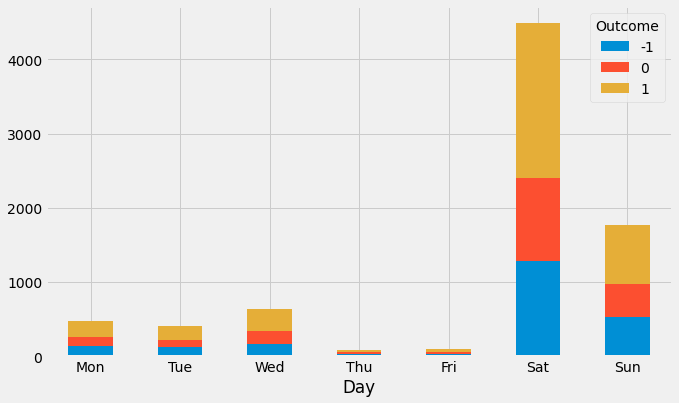

In [9]:
#Day
temp = df.groupby(['Outcome', 'Day']).size().reset_index().pivot(columns='Outcome', index='Day', values=0).loc[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
temp.plot(kind='bar',stacked=True,figsize=(10,6))
plt.xticks(rotation=0)
plt.show()

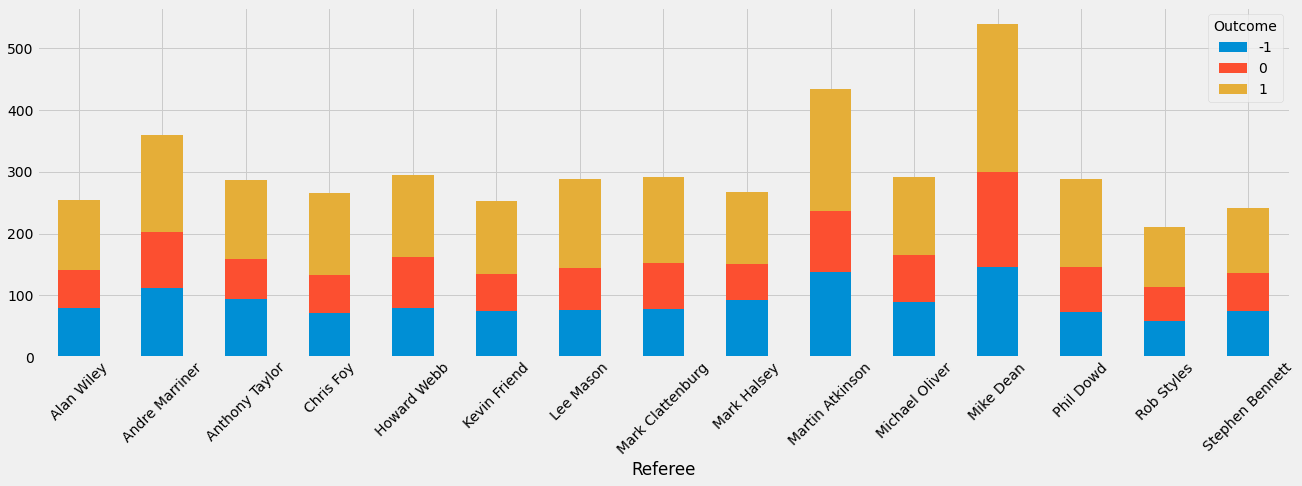

In [10]:
#Referee
top_referee = df['Referee'].value_counts().head(15).index.to_list()
temp = df[df['Referee'].isin(top_referee)].groupby(['Outcome', 'Referee']).size().reset_index().pivot(columns='Outcome', index='Referee', values=0)
temp.plot(kind='bar',stacked=True,figsize=(20,6))
plt.xticks(rotation=45)
plt.show()

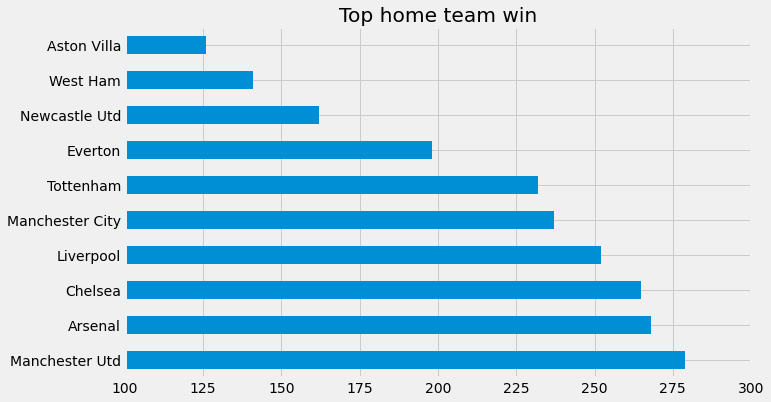

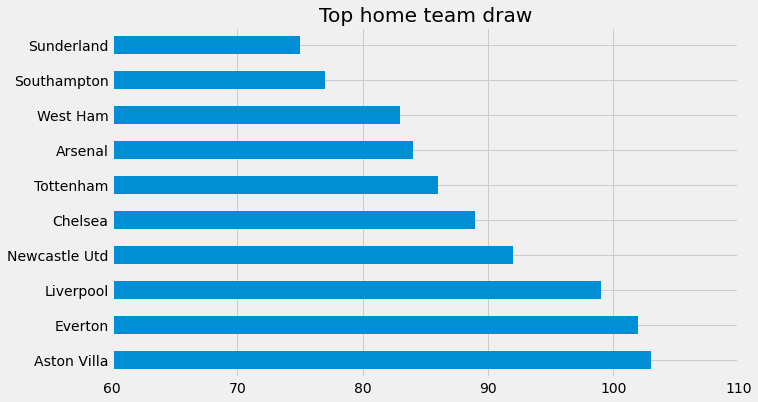

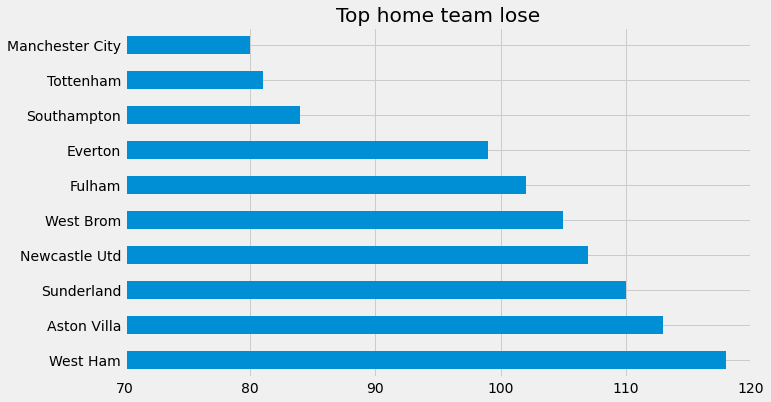

In [11]:
#Home
df[df['Outcome']==1]['Home'].value_counts().head(10).plot(kind='barh',figsize=(10,6),xlim=(100,300))
plt.title('Top home team win')
plt.show()

df[df['Outcome']==0]['Home'].value_counts().head(10).plot(kind='barh',figsize=(10,6),xlim=(60,110))
plt.title('Top home team draw')
plt.show()

df[df['Outcome']==-1]['Home'].value_counts().head(10).plot(kind='barh',figsize=(10,6),xlim=(70,120))
plt.title('Top home team lose')
plt.show()

In [12]:
top_win_home = ['Tottenham','Manchester City','Liverpool','Chelsea','Arsenal','Manchester Utd']
top_draw_home = ['Everton','Aston Villa']
top_lose_home = ['West Ham','Aston Villa','Sunderland','Newcastle Utd','West Brom','Fulham']

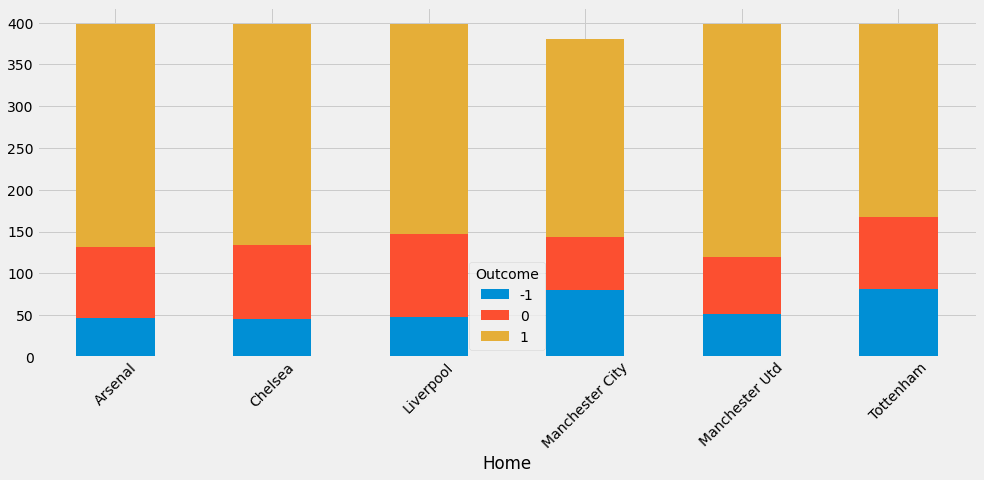

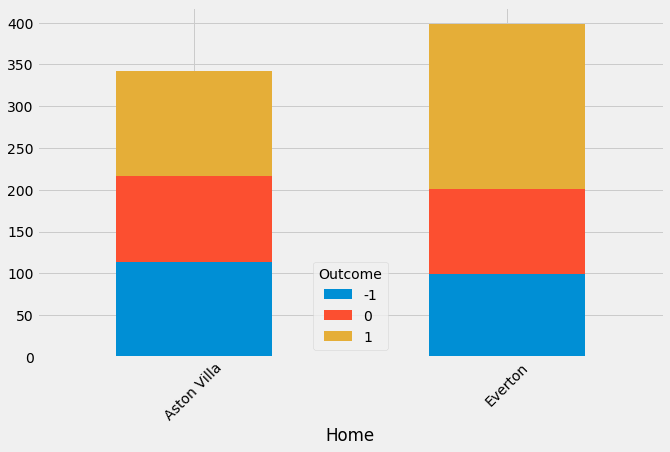

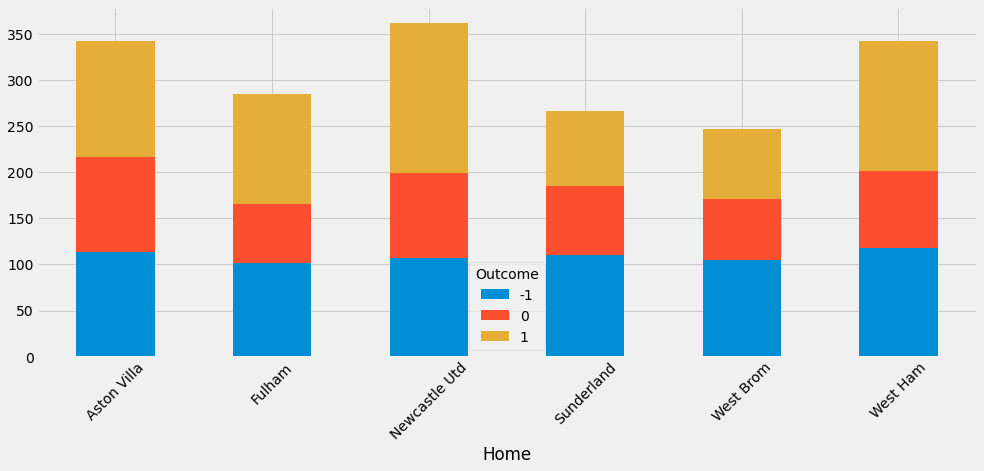

In [13]:
temp = df[df['Home'].isin(top_win_home)].groupby(['Outcome', 'Home']).size().reset_index().pivot(columns='Outcome', index='Home', values=0)
temp.plot(kind='bar',stacked=True,figsize=(15,6))
plt.xticks(rotation=45)
plt.show()

temp = df[df['Home'].isin(top_draw_home)].groupby(['Outcome', 'Home']).size().reset_index().pivot(columns='Outcome', index='Home', values=0)
temp.plot(kind='bar',stacked=True,figsize=(10,6))
plt.xticks(rotation=45)
plt.show()

temp = df[df['Home'].isin(top_lose_home)].groupby(['Outcome', 'Home']).size().reset_index().pivot(columns='Outcome', index='Home', values=0)
temp.plot(kind='bar',stacked=True,figsize=(15,6))
plt.xticks(rotation=45)
plt.show()

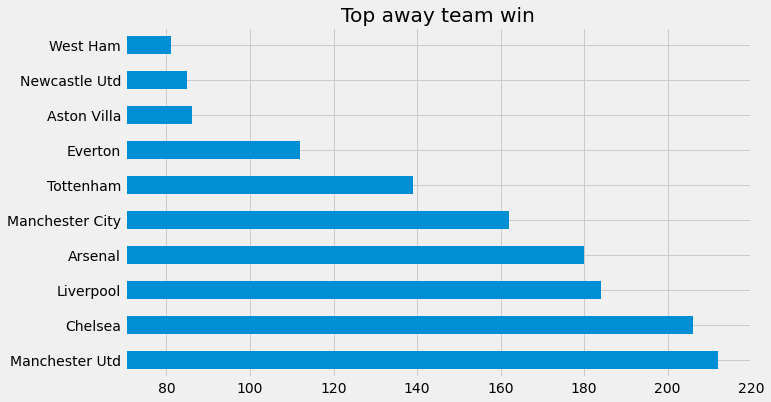

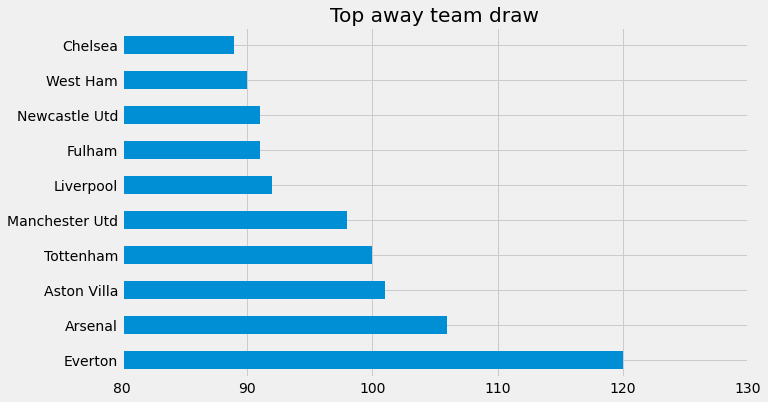

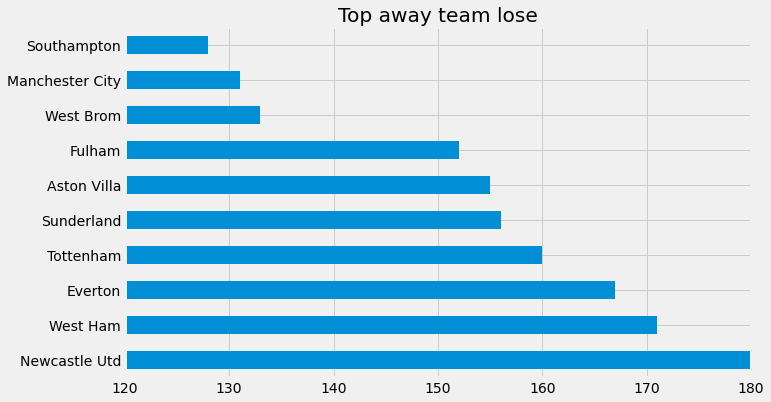

In [14]:
#Away
df[df['Outcome']==-1]['Away'].value_counts().head(10).plot(kind='barh',figsize=(10,6),xlim=(70,220))
plt.title('Top away team win')
plt.show()

df[df['Outcome']==0]['Away'].value_counts().head(10).plot(kind='barh',figsize=(10,6),xlim=(80,130))
plt.title('Top away team draw')
plt.show()

df[df['Outcome']==1]['Away'].value_counts().head(10).plot(kind='barh',figsize=(10,6),xlim=(120,180))
plt.title('Top away team lose')
plt.show()

In [15]:
top_win_away = ['Tottenham','Manchester City','Liverpool','Chelsea','Arsenal','Manchester Utd']
top_draw_away = ['Everton','Aston Villa','Arsenal']
top_lose_away = ['West Ham','Newcastle Utd','Everton','Tottenham']

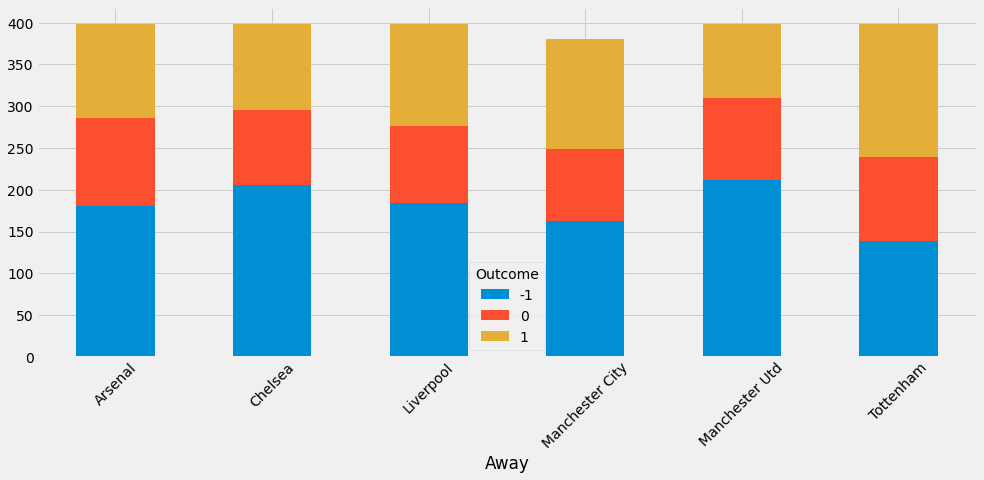

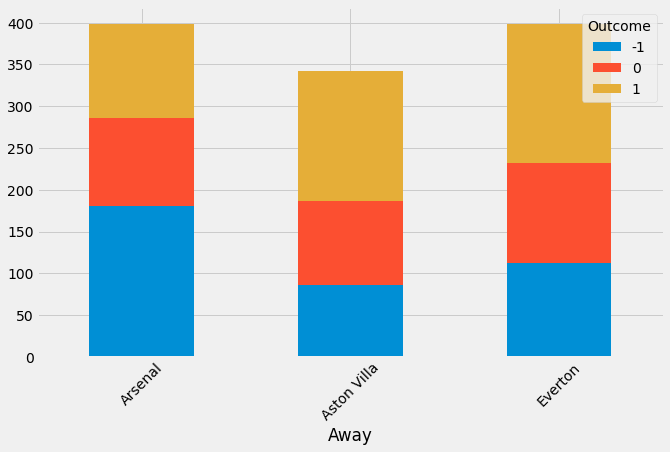

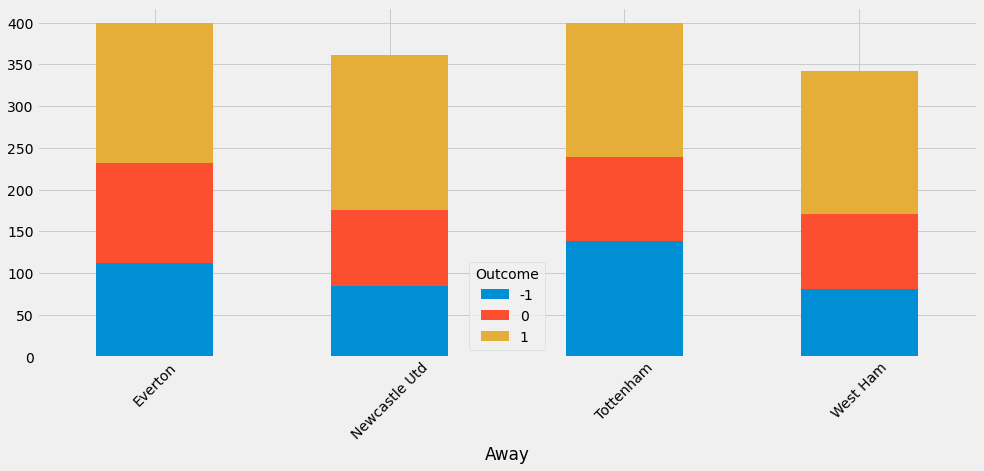

In [16]:
temp = df[df['Away'].isin(top_win_away)].groupby(['Outcome', 'Away']).size().reset_index().pivot(columns='Outcome', index='Away', values=0)
temp.plot(kind='bar',stacked=True,figsize=(15,6))
plt.xticks(rotation=45)
plt.show()

temp = df[df['Away'].isin(top_draw_away)].groupby(['Outcome', 'Away']).size().reset_index().pivot(columns='Outcome', index='Away', values=0)
temp.plot(kind='bar',stacked=True,figsize=(10,6))
plt.xticks(rotation=45)
plt.show()

temp = df[df['Away'].isin(top_lose_away)].groupby(['Outcome', 'Away']).size().reset_index().pivot(columns='Outcome', index='Away', values=0)
temp.plot(kind='bar',stacked=True,figsize=(15,6))
plt.xticks(rotation=45)
plt.show()

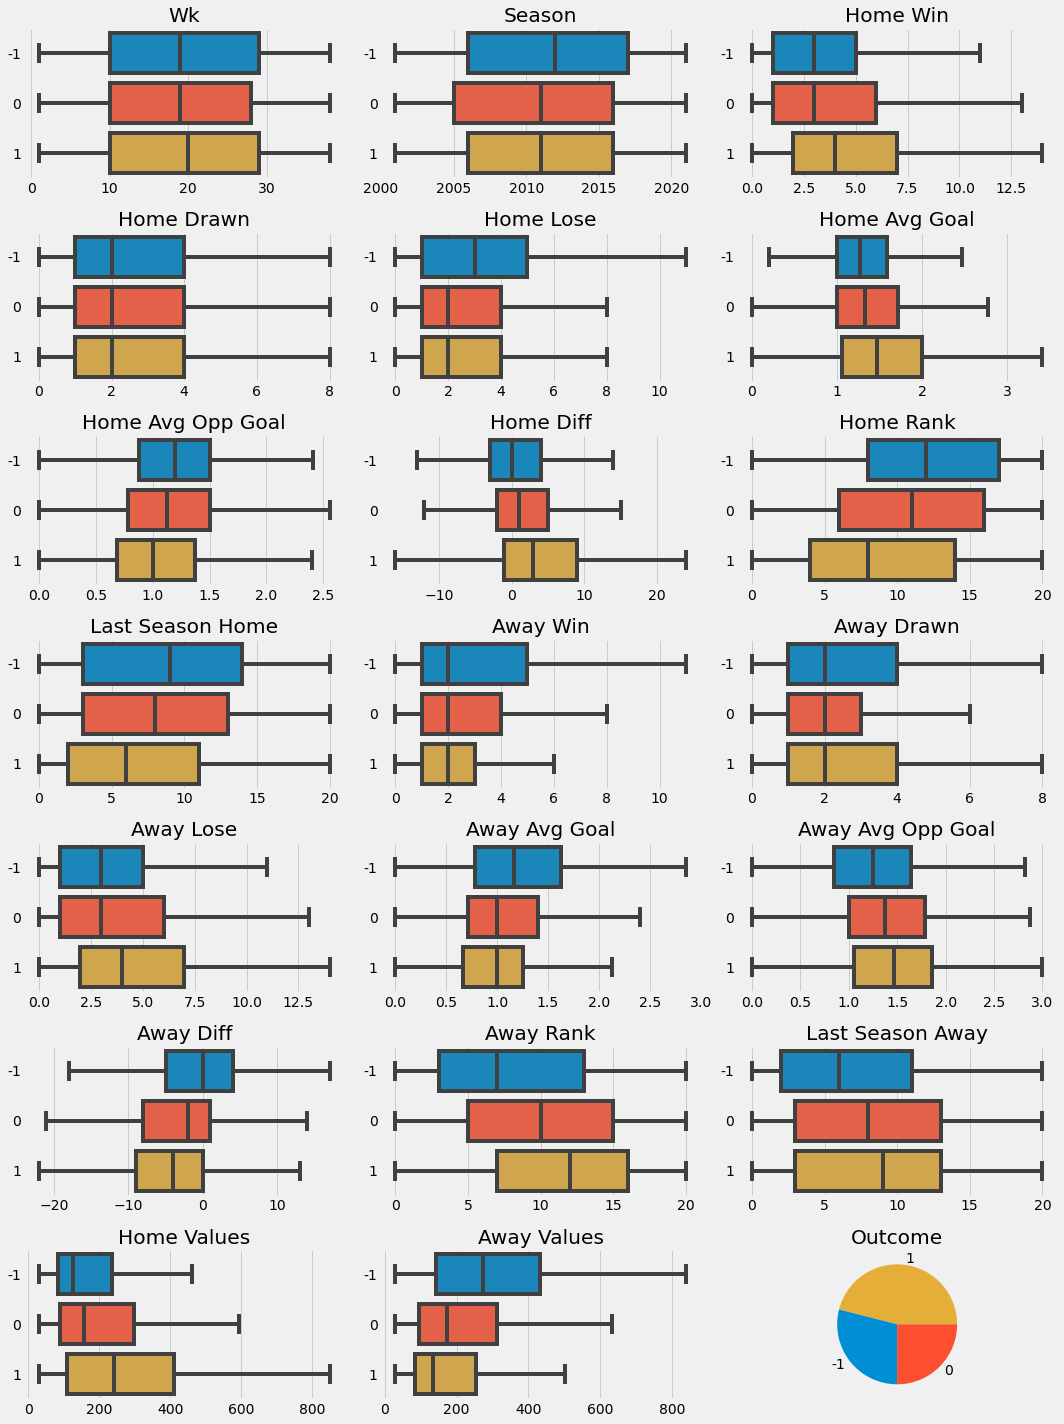

In [17]:
#All numerics features
num_features = df.select_dtypes(exclude=['datetime','object','category']).columns.to_list()
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
row = 0
col = 0

for i in range(1,21):
    if (i % 3 == 1) and (i > 1):
        row += 1
        col = 0
    sns.boxplot(x=num_features[i-1],y='Outcome',data=df,showfliers=False,ax=axs[row,col])
    axs[row,col].set(ylabel='',xlabel='',title=f'{num_features[i-1]}')
    col += 1

df['Outcome'].value_counts().plot(kind='pie',ax=axs[6,2],colors =[mypal[2],mypal[0],mypal[1]])
axs[6,2].set(ylabel='',title='Outcome')

plt.tight_layout()
plt.show()

In [18]:
df[num_features].head()

,Wk,Season,Home Win,Home Drawn,Home Lose,Home Avg Goal,Home Avg Opp Goal,Home Diff,Home Rank,Last Season Home,Away Win,Away Drawn,Away Lose,Away Avg Goal,Away Avg Opp Goal,Away Diff,Away Rank,Last Season Away,Home Values,Away Values
0,1.0,2001,0,0,0,0.0,0.0,0,0,19,0,0,0,0.0,0.0,0,0,0,NaN,NaN
1,1.0,2001,0,0,0,0.0,0.0,0,0,11,0,0,0,0.0,0.0,0,0,7,NaN,NaN
2,1.0,2001,0,0,0,0.0,0.0,0,0,14,0,0,0,0.0,0.0,0,0,5,NaN,NaN
3,1.0,2001,0,0,0,0.0,0.0,0,0,1,0,0,0,0.0,0.0,0,0,8,NaN,NaN
4,1.0,2001,0,0,0,0.0,0.0,0,0,16,0,0,0,0.0,0.0,0,0,17,NaN,NaN


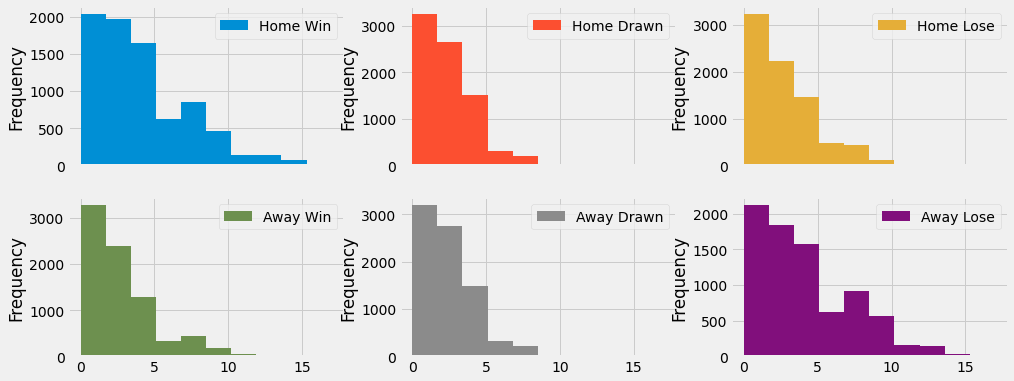

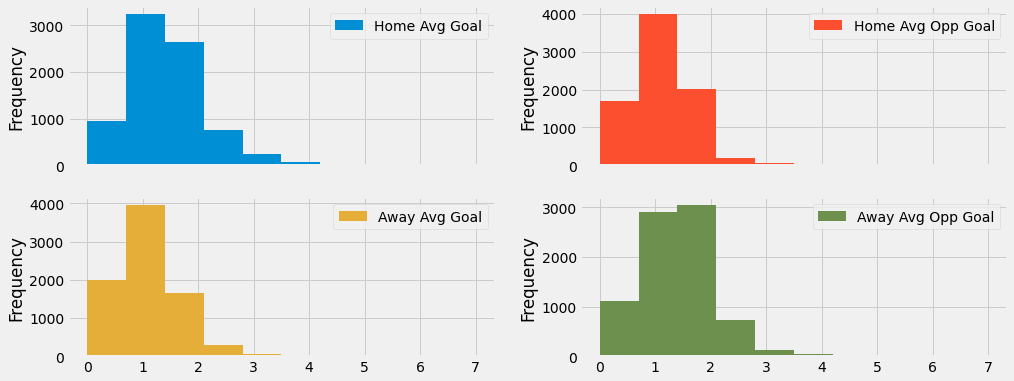

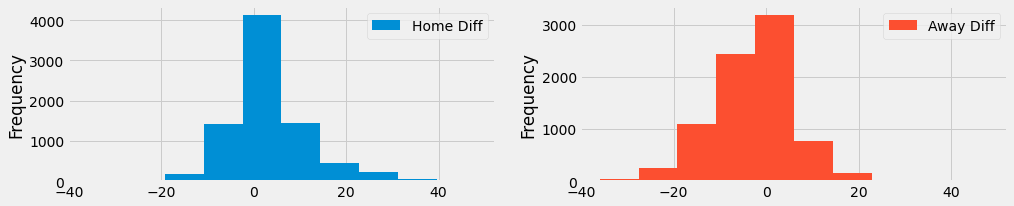

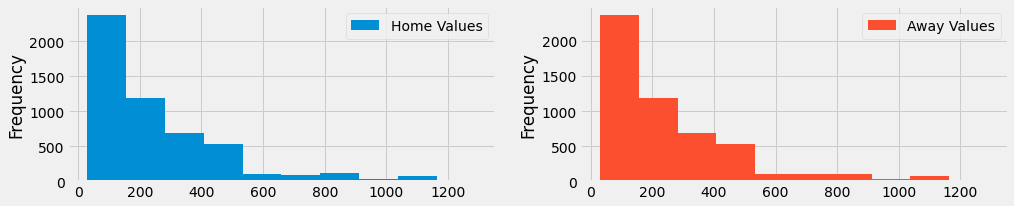

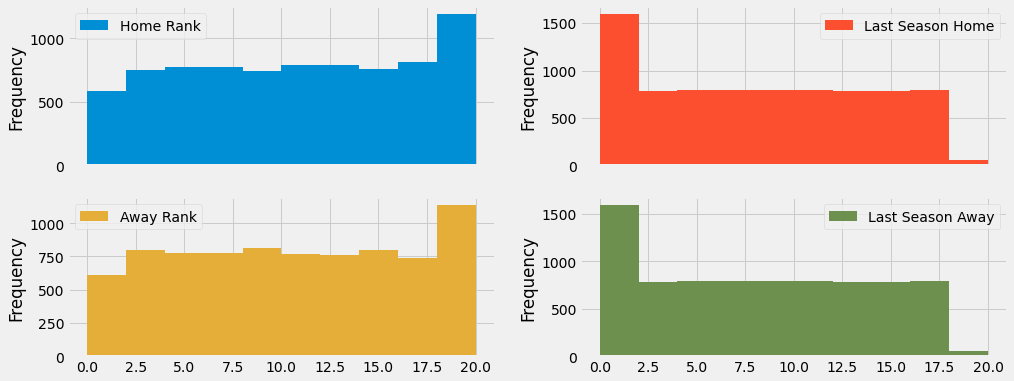

In [19]:
#Distribution
match = ['Home Win','Home Drawn','Home Lose','Away Win','Away Drawn','Away Lose']
goal = ['Home Avg Goal','Home Avg Opp Goal','Away Avg Goal','Away Avg Opp Goal']
diff = ['Home Diff','Away Diff']
rank = ['Home Rank','Last Season Home','Away Rank','Last Season Away']
values = ['Home Values','Away Values']

df[match].plot(kind='hist',subplots=True,layout=(2,3),figsize=(15,6))
plt.show()

df[goal].plot(kind='hist',subplots=True,layout=(2,2),figsize=(15,6))
plt.show()

df[diff].plot(kind='hist',subplots=True,layout=(1,2),figsize=(15,3))
plt.show()

df[values].plot(kind='hist',subplots=True,layout=(1,2),figsize=(15,3))
plt.show()

df[rank].plot(kind='hist',subplots=True,layout=(2,2),figsize=(15,6))
plt.show()

### Complete missing and correct values

- In the Last Season Home and Last Season Away columns, zero values mean that in the season before, that team does not compete in the tournament, so I will convert zero values to 21 (the max rank is 20).

In [20]:
df.loc[df['Last Season Home']==0,'Last Season Home'] = 21
df.loc[df['Last Season Away']==0,'Last Season Away'] = 21

- When completing missing values of team values, first we will use the median value of team values over the seasons to fill in the season that team's missing data. The rest of missing values, we will use the median values of all teams in the season that have missing data to fill the team's missing data

In [21]:
#Complete missing values of team values
missing_home_team = list(df.loc[df['Home Values'].isnull(),'Home'].unique())
for team in missing_home_team:
    df.loc[(df['Home Values'].isnull())&(df['Home']==team),'Home Values']\
        = df.dropna()[['Season','Home','Home Values']].drop_duplicates().loc[df['Home']==team,'Home Values'].median()
missing_home_season = list(df.loc[df['Home Values'].isnull(),'Season'].unique())
for ss in missing_home_season:
    df.loc[(df['Home Values'].isnull())&(df['Season']==ss),'Home Values']\
        = df[['Season','Home','Home Values']].drop_duplicates(['Season','Home']).loc[df['Season']==ss,'Home Values'].median()

missing_away_team = list(df.loc[df['Away Values'].isnull(),'Away'].unique())
for team in missing_away_team:
    df.loc[(df['Away Values'].isnull())&(df['Away']==team),'Away Values']\
        = df.dropna()[['Season','Away','Away Values']].drop_duplicates().loc[df['Away']==team,'Away Values'].median()
missing_away_season = list(df.loc[df['Away Values'].isnull(),'Season'].unique())
for ss in missing_away_season:
    df.loc[(df['Away Values'].isnull())&(df['Season']==ss),'Away Values']\
        = df[['Season','Away','Away Values']].drop_duplicates(['Season','Away']).loc[df['Season']==ss,'Away Values'].median()

### Feature Creation and Engineering

In [22]:
#Encoding category data
df['Date'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = np.where(df['Day'].isin(['Mon','Sun','Sat']),1,0)
df['Referee'] = np.where(df['Referee'].isin(df['Referee'].value_counts().head(10).index.to_list()),1,0)

df.rename(columns={'Date':'Month','Day':'Weekend','Referee':'Top Referee'},inplace=True)

In [23]:
#Feature extraction
df['Home Win Percent'] = df['Home Win']/(df['Home Win']+df['Home Drawn']+df['Home Lose'])
df['Home Lose Percent'] = df['Home Lose']/(df['Home Win']+df['Home Drawn']+df['Home Lose'])
df.drop(['Home Win', 'Home Drawn','Home Lose'],axis=1,inplace=True)

df['Away Win Percent'] = df['Away Win']/(df['Away Win']+df['Away Drawn']+df['Away Lose'])
df['Away Lose Percent'] = df['Away Lose']/(df['Away Win']+df['Away Drawn']+df['Away Lose'])
df.drop(['Away Win', 'Away Drawn','Away Lose'],axis=1,inplace=True)

#With the NA values in these 4 new columns, that implies there is no information before the match happened, so it win, drawn and lose percent is 1/3
df['Home Win Percent'].fillna(value=1/3,inplace=True)
df['Home Lose Percent'].fillna(value=1/3,inplace=True)

df['Away Win Percent'].fillna(value=1/3,inplace=True)
df['Away Lose Percent'].fillna(value=1/3,inplace=True)

In [24]:
#Rename Difference Goal column for not misunderstand
df.rename(columns={'Home Diff':'Home Diff Goal','Away Diff':'Away Diff Goal'},inplace=True)

In [25]:
#Create "difference" features between home and away team
df['Avg Goal (diff)'] = df['Home Avg Goal'] - df['Away Avg Goal']
df['Avg Opp Goal (diff)'] = df['Home Avg Opp Goal'] - df['Away Avg Opp Goal']
df['Diff Goal (diff)'] = df['Home Diff Goal'] - df['Away Diff Goal']
df['Rank (diff)'] = df['Home Rank'] - df['Away Rank']
df['Last Season (diff)'] = df['Last Season Home'] - df['Last Season Away']
df['Values (diff)'] = df['Home Values'] - df['Away Values']
df['Win Percent (diff)'] = df['Home Win Percent'] - df['Away Win Percent']
df['Lose Percent (diff)'] = df['Home Lose Percent'] - df['Away Lose Percent']

df.drop(['Away Avg Goal','Away Avg Opp Goal','Away Diff Goal','Away Rank','Last Season Away','Away Values','Away Win Percent','Away Lose Percent'],axis=1,inplace=True)

In [26]:
#Create new features from Home and Away team
df['Top Win Home'] = np.where(df['Home'].isin(top_win_home),1,0)
df['Top Draw Home'] = np.where(df['Home'].isin(top_draw_home),1,0)
df['Top Lose Home'] = np.where(df['Home'].isin(top_lose_home),1,0)

df['Top Win Away'] = np.where(df['Away'].isin(top_win_away),1,0)
df['Top Draw Away'] = np.where(df['Away'].isin(top_draw_away),1,0)
df['Top Lose Away'] = np.where(df['Away'].isin(top_lose_away),1,0)

df.drop(['Home','Away'],axis=1,inplace=True)

In [27]:
#Drop useless columns
df.drop(['Wk','Season'],axis=1,inplace=True)

In [28]:
# #Features transformation
# df['Home Avg Goal'] = np.log(df['Home Avg Goal']+1)
# df['Home Avg Opp Goal'] = np.log(df['Home Avg Opp Goal']+1)
# df['Home Values'] = np.log(df['Home Values']+1)
# df['Home Win Percent'] = np.log(df['Home Win Percent']+1)
# df['Home Lose Percent'] = np.log(df['Home Lose Percent']+1)

### Features Selection

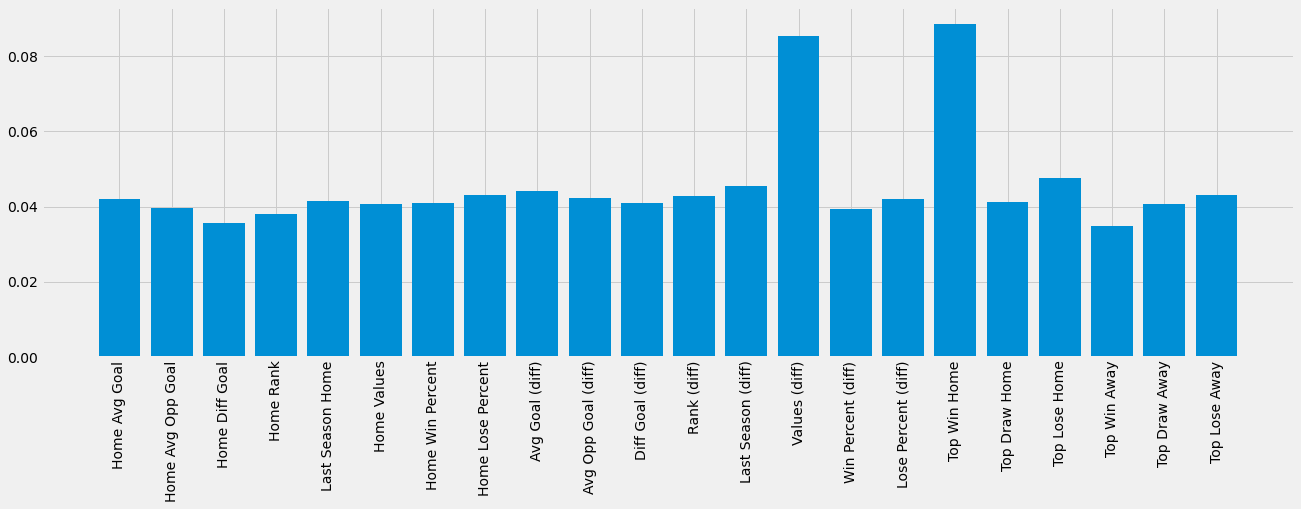

In [29]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

X = df.drop(['Outcome','Weekend','Month','Top Referee'],axis=1)
y = df['Outcome']

model = XGBClassifier(eval_metric='mlogloss')
model.fit(X,y)

plt.figure(figsize=(20,6))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(ticks=range(len(list(X.columns))),labels = list(X.columns),rotation=90)
plt.show()

In [35]:
df.to_csv('data/train.csv',index=False)